# Problem Statement :
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

 

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not. The company wants to know

- Which variables are significant in predicting the price of a house, and
- How well those variables describe the price of a house.

Also, determine the optimal value of lambda for ridge and lasso regression.



# Business Goal :
You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.



In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression,Ridge,Lasso
import statsmodels
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

#Ignore Warnings
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

### Reading and understand dataset

In [2]:
pd.options.display.min_rows = 115

dataset = pd.read_csv("train.csv")
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
dataset.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [4]:
dataset.describe(include='all')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460.000000,1460,1201.000000,1460.000000,1460,91,1460,1460,1460,...,1460.000000,7,281,54,1460.000000,1460.000000,1460.000000,1460,1460,1460.000000
unique,NaN,NaN,5,NaN,NaN,2,2,4,4,2,...,NaN,3,4,4,NaN,NaN,NaN,9,6,NaN
top,NaN,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,...,NaN,Gd,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,NaN,1151,NaN,NaN,1454,50,925,1311,1459,...,NaN,3,157,49,NaN,NaN,NaN,1267,1198,NaN
mean,730.500000,56.897260,NaN,70.049958,10516.828082,NaN,NaN,NaN,NaN,NaN,...,2.758904,NaN,NaN,NaN,43.489041,6.321918,2007.815753,NaN,NaN,180921.195890
std,421.610009,42.300571,NaN,24.284752,9981.264932,NaN,NaN,NaN,NaN,NaN,...,40.177307,NaN,NaN,NaN,496.123024,2.703626,1.328095,NaN,NaN,79442.502883
min,1.000000,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,1.000000,2006.000000,NaN,NaN,34900.000000
25%,365.750000,20.000000,NaN,59.000000,7553.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,5.000000,2007.000000,NaN,NaN,129975.000000
50%,730.500000,50.000000,NaN,69.000000,9478.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,6.000000,2008.000000,NaN,NaN,163000.000000
75%,1095.250000,70.000000,NaN,80.000000,11601.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,8.000000,2009.000000,NaN,NaN,214000.000000


In [5]:
dataset.shape

(1460, 81)

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
dataset.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
                 ... 
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       690
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageCars          0
GarageArea          0
GarageQual         81
GarageCond         81
PavedDrive

In [8]:
dataset.nunique()

Id               1460
MSSubClass         15
MSZoning            5
LotFrontage       110
LotArea          1073
Street              2
Alley               2
LotShape            4
LandContour         4
Utilities           2
LotConfig           5
LandSlope           3
Neighborhood       25
Condition1          9
Condition2          8
BldgType            5
HouseStyle          8
OverallQual        10
OverallCond         9
YearBuilt         112
YearRemodAdd       61
RoofStyle           6
RoofMatl            8
Exterior1st        15
Exterior2nd        16
MasVnrType          4
MasVnrArea        327
ExterQual           4
ExterCond           5
Foundation          6
                 ... 
BedroomAbvGr        8
KitchenAbvGr        4
KitchenQual         4
TotRmsAbvGrd       12
Functional          7
Fireplaces          4
FireplaceQu         5
GarageType          6
GarageYrBlt        97
GarageFinish        3
GarageCars          5
GarageArea        441
GarageQual          5
GarageCond          5
PavedDrive

In [9]:
dataset.Street.value_counts()

Pave    1454
Grvl       6
Name: Street, dtype: int64

In [10]:
dataset.Alley.value_counts()

Grvl    50
Pave    41
Name: Alley, dtype: int64

In [11]:
dataset.PoolQC.value_counts()

Gd    3
Ex    2
Fa    2
Name: PoolQC, dtype: int64

In [12]:
dataset.Utilities.value_counts()

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

## Data cleaning

In [13]:
## Checking percentage of Null values in the dataser

missing_data=pd.DataFrame((round(100*(dataset.isnull().sum()/len(dataset.index)), 2)), columns=['missing'])
missing_data.sort_values(by=['missing'], ascending=False).head(20)

,missing
PoolQC,99.52
MiscFeature,96.30
Alley,93.77
Fence,80.75
FireplaceQu,47.26
LotFrontage,17.74
GarageYrBlt,5.55
GarageCond,5.55
GarageType,5.55
GarageFinish,5.55


In [14]:
# replace all null values with understandable data

dataset['PoolQC'] = dataset['PoolQC'].fillna('NA')
dataset['MiscFeature'] = dataset['MiscFeature'].fillna('NA')
dataset['Alley'] = dataset['Alley'].fillna('NA')
dataset['Fence'] = dataset['Fence'].fillna('NA')
dataset['FireplaceQu'] = dataset['FireplaceQu'].fillna('NA')
dataset['GarageYrBlt'] = dataset['GarageYrBlt'].fillna(0)
dataset['MasVnrType'] = dataset['MasVnrType'].fillna('NA')
dataset['MasVnrArea'] = dataset['MasVnrArea'].fillna(0)
dataset['MasVnrArea'] = dataset['MasVnrArea'].fillna(0)
dataset['Electrical'] = dataset['Electrical'].fillna("NA")

In [15]:
# drop LotFrontage because of multiple null values and replacing other columns with NA
dataset.drop("LotFrontage",axis = 1, inplace=True)
for col in ('BsmtFinType1', 'BsmtFinType2', 'BsmtExposure', 'BsmtQual','BsmtCond'):
    dataset[col] = dataset[col].fillna('NA')
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    dataset[col] = dataset[col].fillna('NA')

In [16]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [17]:
# converting GarageYrBlt to Int type
dataset['GarageYrBlt'] = dataset['GarageYrBlt'].astype(int)

## EDA

Text(0.5, 1.0, 'Area')

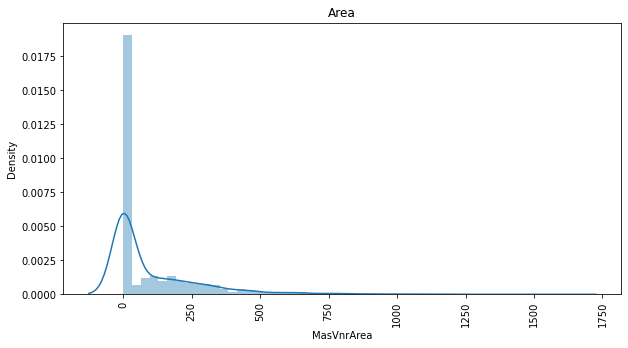

In [18]:
# distplot for MasVnrArea
plt.figure(figsize = (10,5))
sns.distplot(dataset['MasVnrArea']).tick_params(axis='x', rotation = 90)
plt.title('Area')

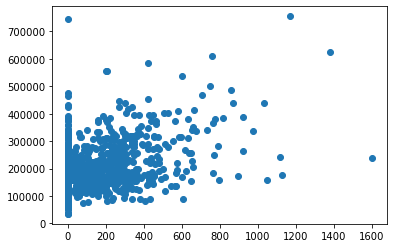

In [19]:
plt.scatter(dataset.MasVnrArea,dataset.SalePrice)

In [20]:
print("Kurtosis: %f" % dataset['SalePrice'].kurt())
print("Skewness: %f" % dataset['SalePrice'].skew())

Kurtosis: 6.536282
Skewness: 1.882876


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

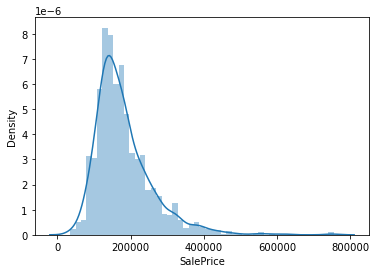

In [21]:
sns.distplot(dataset['SalePrice'])

Text(0.5, 1.0, 'LivArea vs Sales Price')

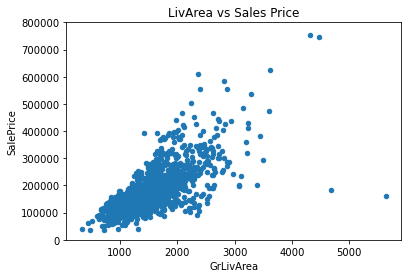

In [22]:
data = pd.concat([dataset['SalePrice'], dataset['GrLivArea']], axis=1)
data.plot.scatter(x='GrLivArea', y='SalePrice', ylim=(0,800000));
plt.title('LivArea vs Sales Price')

Text(0.5, 1.0, 'Condition')

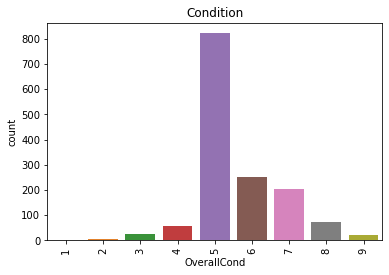

In [23]:
sns.countplot(x='OverallCond', data= dataset).tick_params(axis='x', rotation = 90)
plt.title('Condition')

Text(0.5, 1.0, 'Condition')

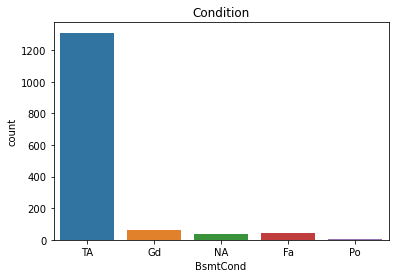

In [24]:
## Checking counts
sns.countplot(x='BsmtCond', data= dataset)
plt.title('Condition')

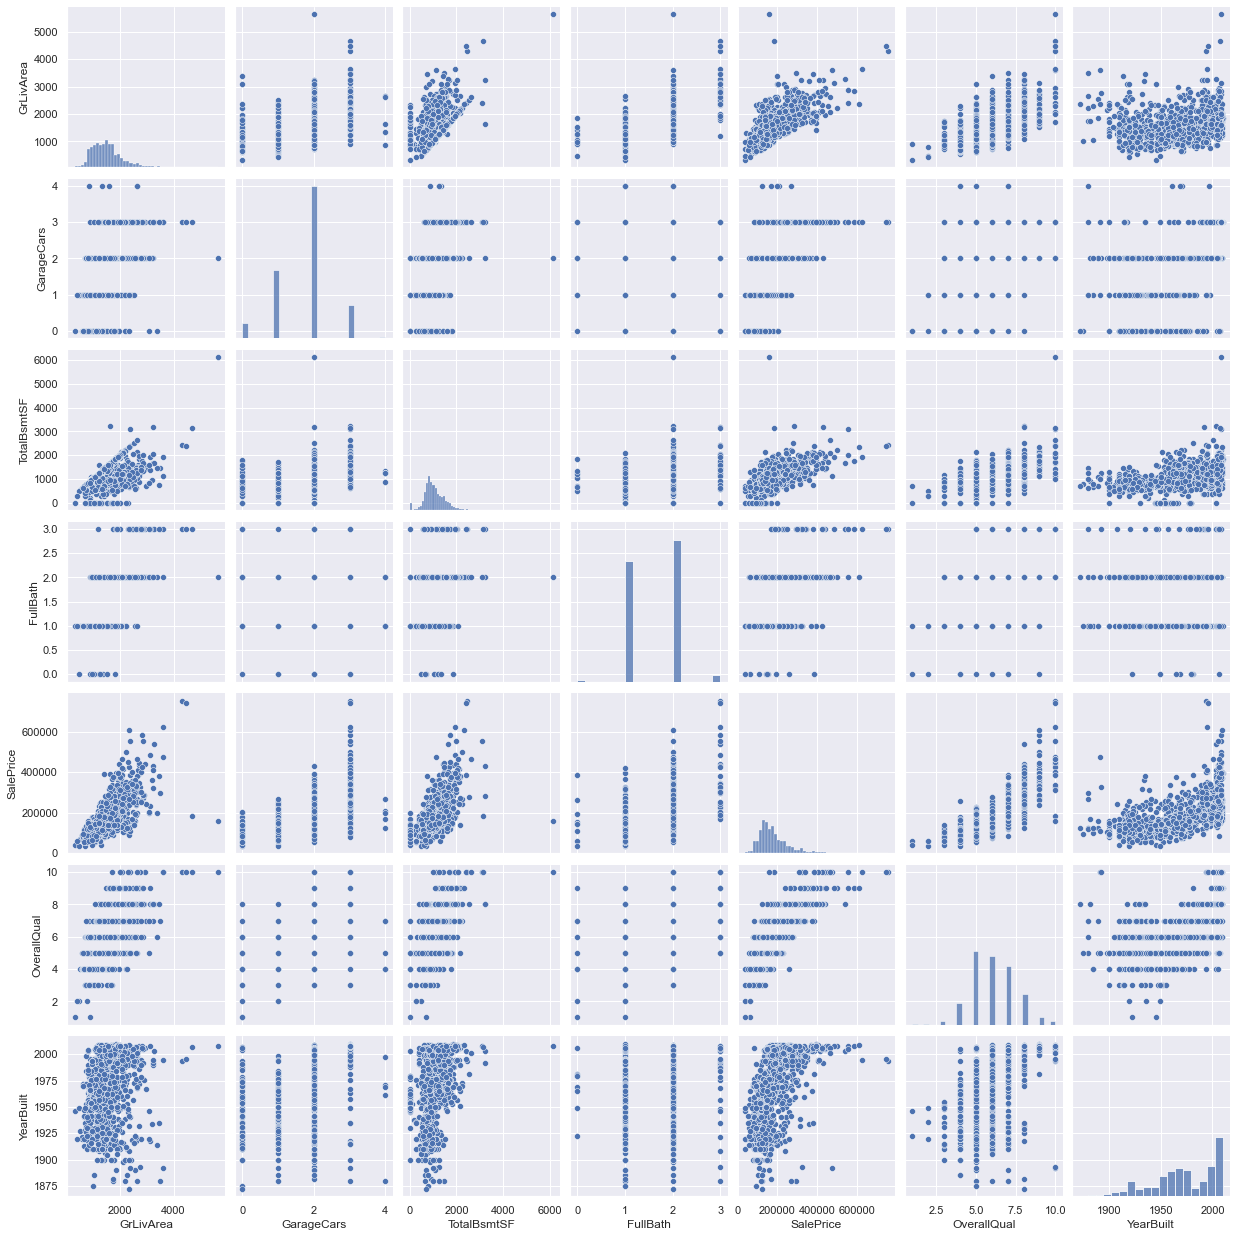

In [25]:
# checking scatterplot
sns.set()
cols = ['GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'SalePrice', 'OverallQual', 'YearBuilt']
sns.pairplot(dataset[cols], size = 2.5)
plt.show();

<AxesSubplot:xlabel='SalePrice'>

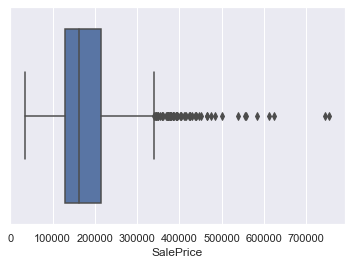

In [26]:
# Checking the outliers in sale price

sns.boxplot(x='SalePrice', data=dataset)

Text(0.5, 1.0, 'Quality vs Sale Price')

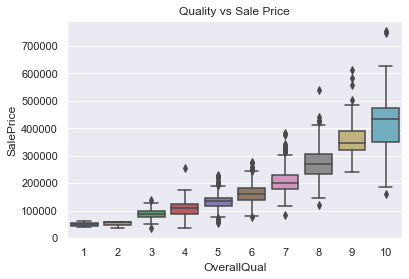

In [27]:
sns.boxplot(x='OverallQual', y='SalePrice', data=dataset)
plt.title("Quality vs Sale Price")

Text(0.5, 1.0, 'Correlation matrix ')

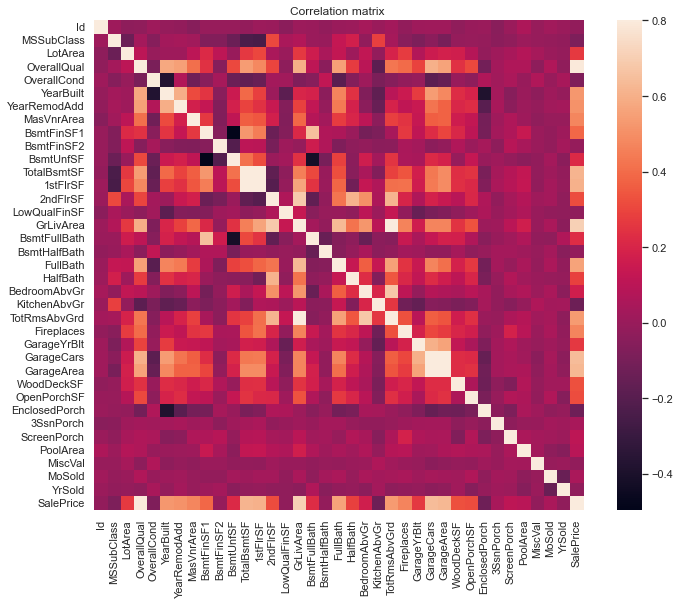

In [28]:
# Correlation matrix

corrmat = dataset.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);
plt.title("Correlation matrix ")

## Prepare Data for analysis

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

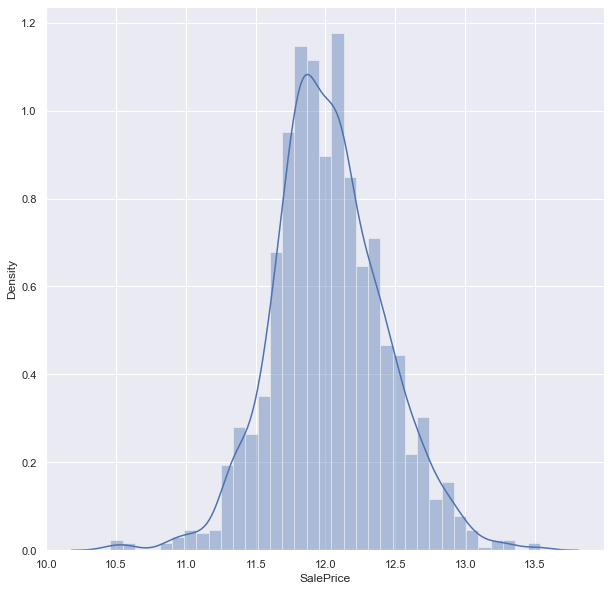

In [29]:
plt.figure(figsize=(10,10))
sns.distplot(np.log(dataset["SalePrice"]))

In [30]:
numeric_values = dataset.select_dtypes(include = ['float64','int64'])
numeric_values.columns

Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [31]:
dataset['CentralAir'] = dataset['CentralAir'].apply(lambda x : 1 if x == 'Y' else 0)
dataset['Street'] = dataset['Street'].apply(lambda x: 1 if x == 'Pave' else 0 )                                                  
dataset['PavedDrive'] = dataset['PavedDrive'].apply(lambda x : 1 if x == 'Y' else 0) 
category_val = dataset.select_dtypes(include=['object'])
category_val.head()

,MSZoning,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,NA,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,NA,Attchd,RFn,TA,TA,NA,NA,NA,WD,Normal
1,RL,NA,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,TA,Attchd,RFn,TA,TA,NA,NA,NA,WD,Normal
2,RL,NA,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,TA,Attchd,RFn,TA,TA,NA,NA,NA,WD,Normal
3,RL,NA,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,Gd,Detchd,Unf,TA,TA,NA,NA,NA,WD,Abnorml
4,RL,NA,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,TA,Attchd,RFn,TA,TA,NA,NA,NA,WD,Normal


In [32]:
dummy_data = pd.get_dummies(category_val, drop_first=True)
dummy_data.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Alley_NA,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [33]:
df = dataset.drop(['Id'],axis=1)
df = df.drop(list(category_val.columns), axis=1)
df = pd.concat([df,dummy_data], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 260 entries, MSSubClass to SaleCondition_Partial
dtypes: float64(1), int64(38), uint8(221)
memory usage: 760.1 KB


## Split Testing Data

In [34]:
train_dataset,test_dataset = train_test_split(df, train_size=0.7,test_size = 0.3, random_state=100)
y_train = np.log(train_dataset.SalePrice)
X_train = train_dataset.drop("SalePrice",1)

y_test= np.log(test_dataset.SalePrice)
X_test = test_dataset.drop("SalePrice",1)

In [35]:
number_values=X_train.select_dtypes(include=['int64','float64']).columns
print(number_values)

Index(['MSSubClass', 'LotArea', 'Street', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', 'CentralAir', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold'],
      dtype='object')


In [36]:
# Using standard scaler
scaler = StandardScaler()
X_train[number_values] = scaler.fit_transform(X_train[number_values])
X_test[number_values] = scaler.transform(X_test[number_values])

In [37]:
# Creating regression model
regression = LinearRegression()
regression.fit(X_train,y_train)

LinearRegression()

In [38]:
# Calculate RFE and print
rfe = RFE(regression, 20)
rfe = rfe.fit(X_train, y_train)
rfe

RFE(estimator=LinearRegression(), n_features_to_select=20)

In [39]:
col=X_train.columns[rfe.support_]
col

Index(['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'RoofMatl_CompShg',
       'RoofMatl_Membran', 'RoofMatl_Metal', 'RoofMatl_Roll',
       'RoofMatl_Tar&Grv', 'RoofMatl_WdShake', 'RoofMatl_WdShngl',
       'Exterior1st_AsphShn', 'BsmtQual_NA', 'BsmtCond_NA', 'BsmtFinType1_NA',
       'PoolQC_Gd'],
      dtype='object')

In [40]:

X_train_new=X_train[col]
X_train_new = sm.add_constant(X_train_new)

In [41]:
lr=sm.OLS(y_train,X_train_new)

In [42]:
# Fit the model
lr_model=lr.fit()

In [43]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.684
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                     145.3
Date:                Wed, 13 Jul 2022   Prob (F-statistic):          3.16e-239
Time:                        13:59:09   Log-Likelihood:                 84.716
No. Observations:                1021   AIC:                            -137.4
Df Residuals:                    1005   BIC:                            -58.58
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  10.2727      0.056    183.007      0.000      10.163      10.383
BsmtFinSF1              0.0959      0.007     13.250      0.000       0.082       0.110
BsmtFinSF2              0.0063      0.007      0.870      0.384      -0.008       0.020
BsmtUnfSF               0.0420      0.007      6.092      0.000       0.028       0.056
TotalBsmtSF             0.1405      0.012     11.850      0.000       0.117       0.164
1stFlrSF                0.0519      0.012      4.418      0.000       0.029       0.075
2ndFlrSF                0.0963      0.007     14.626      0.000       0.083       0.109
LowQualFinSF           -0.0342      0.007     -4.839      0.000      -0.048      -0.020
GrLivArea               0.1146      0.006     19.460      0.000       0.103       0.126
RoofMatl_CompShg        1.7509      0.056     31.056      0.000       1.640       1.862
RoofMatl_Membran        2.1546      0.209     10.304      0.000       1.744       2.565
RoofMatl_Metal          2.0285      0.206      9.844      0.000       1.624       2.433
RoofMatl_Roll           1.4279      0.206      6.928      0.000       1.023       1.832
RoofMatl_Tar&Grv        1.6707      0.098     16.980      0.000       1.478       1.864
RoofMatl_WdShake        1.7856      0.116     15.359      0.000       1.558       2.014
RoofMatl_WdShngl        1.8393      0.113     16.304      0.000       1.618       2.061
Exterior1st_AsphShn    -0.1467      0.230     -0.639      0.523      -0.597       0.304
BsmtQual_NA             0.0278      0.020      1.423      0.155      -0.011       0.066
BsmtCond_NA             0.0278      0.020      1.423      0.155      -0.011       0.066
BsmtFinType1_NA         0.0278      0.020      1.423      0.155      -0.011       0.066
PoolQC_Gd              -2.3848      0.228    -10.442      0.000      -2.833      -1.937
==============================================================================
Omnibus:                      439.237   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4331.135
Skew:                          -1.704   Prob(JB):                         0.00
Kurtosis:                      12.497   Cond. No.                     5.72e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 8.33e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

## Rdge regression

In [44]:
alphas = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100]}


In [45]:
ridge = Ridge()

folds = 5
model = GridSearchCV(estimator = ridge, 
                        param_grid = alphas, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model.fit(X_train, y_train)

Fitting 5 folds for each of 26 candidates, totalling 130 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [46]:
print(model.best_params_)
print(model.best_score_)

{'alpha': 0.2}
-0.08888436687222007


In [47]:
results = pd.DataFrame(model.cv_results_)
results = results[results['param_alpha']<=100]
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.008856,0.005465,0.002113,0.000362,0.0001,{'alpha': 0.0001},-0.091257,-0.095981,-0.095080,-0.087364,...,-0.090465,0.004963,14,-0.054656,-0.055120,-0.055851,-0.056782,-0.055737,-0.055629,0.000721
1,0.005460,0.000361,0.001897,0.000240,0.001,{'alpha': 0.001},-0.090970,-0.095931,-0.095028,-0.087221,...,-0.090349,0.004966,13,-0.054688,-0.055130,-0.055865,-0.056866,-0.055772,-0.055664,0.000739
2,0.005917,0.000511,0.001972,0.000256,0.01,{'alpha': 0.01},-0.090335,-0.095580,-0.094640,-0.086470,...,-0.089908,0.004924,8,-0.054882,-0.055248,-0.056005,-0.057100,-0.055911,-0.055829,0.000760
3,0.005624,0.000443,0.002245,0.000999,0.05,{'alpha': 0.05},-0.089951,-0.094657,-0.094083,-0.084353,...,-0.089220,0.004805,4,-0.055860,-0.055728,-0.056597,-0.057743,-0.056775,-0.056541,0.000725
4,0.005590,0.000817,0.001703,0.000074,0.1,{'alpha': 0.1},-0.089813,-0.094131,-0.094160,-0.082825,...,-0.088890,0.004933,2,-0.057068,-0.056203,-0.057286,-0.058644,-0.057886,-0.057417,0.000817
5,0.005113,0.000141,0.001738,0.000230,0.2,{'alpha': 0.2},-0.090318,-0.093800,-0.094787,-0.081211,...,-0.088884,0.005308,1,-0.059195,-0.056940,-0.058586,-0.060619,-0.059753,-0.059019,0.001236
6,0.005553,0.000561,0.001942,0.000234,0.3,{'alpha': 0.3},-0.090928,-0.093748,-0.095312,-0.080115,...,-0.089001,0.005689,3,-0.060863,-0.057555,-0.059768,-0.062295,-0.061410,-0.060378,0.001632
7,0.005190,0.000555,0.001788,0.000218,0.4,{'alpha': 0.4},-0.091465,-0.093832,-0.095784,-0.079444,...,-0.089265,0.005944,5,-0.062246,-0.058066,-0.060717,-0.063696,-0.062810,-0.061507,0.001975
8,0.004948,0.000087,0.001626,0.000034,0.5,{'alpha': 0.5},-0.091831,-0.093865,-0.096149,-0.079419,...,-0.089534,0.005998,6,-0.063464,-0.058530,-0.061524,-0.064838,-0.063958,-0.062463,0.002246
9,0.005133,0.000414,0.001839,0.000479,0.6,{'alpha': 0.6},-0.092029,-0.093919,-0.096439,-0.079468,...,-0.089741,0.006024,7,-0.064493,-0.058960,-0.062200,-0.065801,-0.064920,-0.063275,0.002464


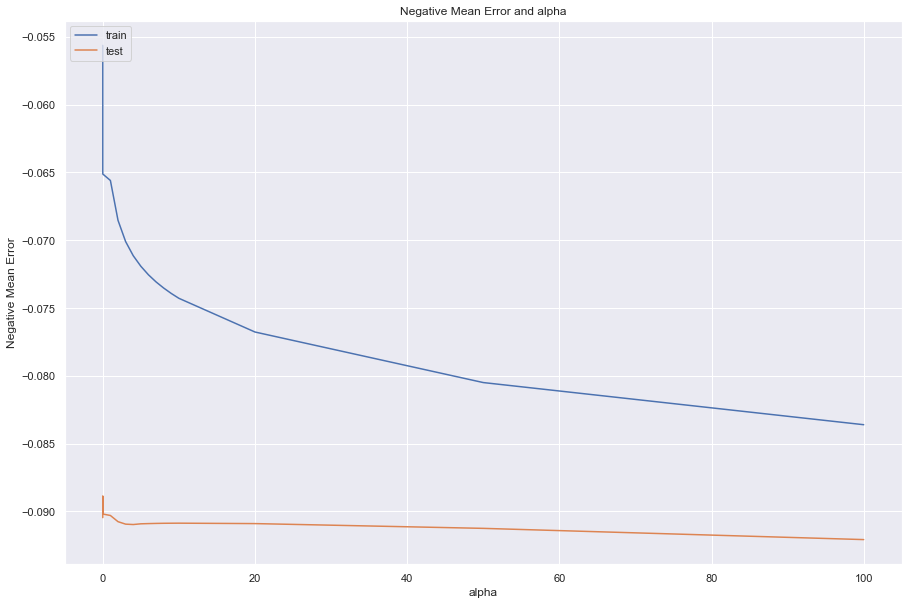

In [48]:
# Plot test scores with mean alpha
results['param_alpha'] = results['param_alpha'].astype('int32')
plt.figure(figsize=(15,10))
plt.plot(results['param_alpha'], results['mean_train_score'])
plt.plot(results['param_alpha'], results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Error')
plt.title("Negative Mean Error and alpha")
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [49]:
# ridge model
alpha = 10
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([-2.13803115e-02,  1.89936909e-02,  7.32738986e-03,  7.96436761e-02,
        4.07746644e-02,  3.72348780e-02,  2.05530850e-02, -2.82526674e-03,
       -1.29472035e-03,  6.99993056e-03,  4.35293818e-03,  5.54731252e-03,
        1.48226234e-02,  3.71846282e-02,  4.20644699e-02,  8.43151555e-04,
        6.23120885e-02,  2.96161237e-02,  2.71086376e-03,  1.87365172e-02,
        1.07550403e-02,  1.21020542e-02, -1.35976200e-02,  1.55552729e-02,
        2.29157617e-03, -4.58483801e-05,  4.02946256e-02,  4.24742314e-03,
        1.44084830e-03,  1.36133567e-02, -2.03690396e-03,  8.78120931e-03,
        7.20769283e-03,  1.06162809e-02, -1.48416341e-02,  3.02992746e-06,
       -1.09250063e-03, -6.41574030e-03,  4.83339410e-02,  3.90789228e-02,
        6.19954392e-02,  1.56768479e-02,  2.13313024e-03,  2.59471447e-02,
        2.43034247e-02, -5.00719287e-02,  4.88217204e-03,  3.81996206e-02,
        3.57593376e-02,  4.69072859e-02, -1.30694363e-02,  3.69450072e-02,
       -3.55220354e-02, -

In [50]:
# predict r-square
y_train_pred = ridge.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))

0.9220057119697037


In [51]:
# test set prediction
y_test_pred = ridge.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.8855467320256145


In [52]:
# RMSE
mean_squared_error(y_test, y_test_pred)


0.01883215404951696

## Lasso Regression

In [53]:
alphas = {'alpha': [0.00005, 0.0001, 0.001, 0.008, 0.01]}
lasso = Lasso()

In [54]:
lasso_model = GridSearchCV(estimator = lasso, 
                        param_grid = alphas, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_model.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [5e-05, 0.0001, 0.001, 0.008, 0.01]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [55]:
results_l = pd.DataFrame(lasso_model.cv_results_)

In [56]:
print(lasso_model.best_score_)
print(lasso_model.best_params_)

-0.08334802100375412
{'alpha': 0.0001}


In [57]:
# lasso model
alpha = 0.001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train)

Lasso(alpha=0.001)

In [58]:
# R-square prediction for train
y_train_pred = lasso.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))

0.9174603869990305


In [59]:
# R-square prediction for test
y_test_pred = lasso.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.855153896620992


In [60]:
mean_squared_error(y_test, y_test_pred)

0.023832994728610186

In [61]:
lasso.coef_

array([-1.59168660e-02,  1.77242515e-02,  7.44417848e-03,  8.92749012e-02,
        4.49157058e-02,  5.23478512e-02,  2.12557290e-02,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  2.73459395e-02,
        1.31313542e-02,  6.83279719e-04,  0.00000000e+00, -2.76090229e-03,
        1.17924486e-01,  3.11590599e-02,  2.04071491e-03,  1.34016928e-02,
        8.46182614e-03,  5.71184428e-03, -1.14936774e-02,  1.31288789e-02,
        6.75035317e-03, -0.00000000e+00,  3.85988418e-02,  5.82205702e-03,
        1.77927095e-03,  1.28633145e-02, -0.00000000e+00,  5.99863586e-03,
        5.33667705e-03,  1.05740180e-02, -1.35240020e-02, -9.49510149e-04,
       -1.35177380e-03, -5.95070193e-03,  0.00000000e+00,  0.00000000e+00,
        4.67117524e-02, -7.00746209e-03,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  2.40381933e-03, -0.00000000e+00,  2.90059351e-02,
       -0.00000000e+00, -

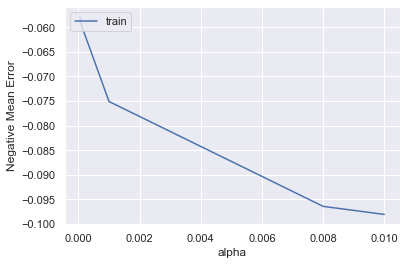

In [62]:
# plot mean test and train
results['param_alpha'] = results['param_alpha'].astype('float32')

# plotting
plt.plot(results_l['param_alpha'], results_l['mean_train_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Error')

plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [63]:
model.best_params_

{'alpha': 0.2}

In [64]:
ridge = Ridge(alpha = 0.1)
ridge.fit(X_train,y_train)

y_pred_train = ridge.predict(X_train)
print(r2_score(y_train,y_pred_train))

y_pred_test = ridge.predict(X_test)
print(r2_score(y_test,y_pred_test))


0.9575199187040073
0.7492288130894567


In [65]:
model_parameter = list(ridge.coef_)
model_parameter.insert(0,ridge.intercept_)
cols = train_dataset.columns
cols.insert(0,'constant')
ridge_coef = pd.DataFrame(list(zip(cols,model_parameter)))
ridge_coef.columns = ['Feaure','Coef']
ridge_coef.sort_values(by='Coef',ascending=False).head(10)


,Feaure,Coef
0,MSSubClass,10.803302
114,RoofMatl_Membran,0.434518
39,MSZoning_FV,0.402129
41,MSZoning_RL,0.401668
40,MSZoning_RH,0.396884
42,MSZoning_RM,0.354961
116,RoofMatl_Roll,0.308425
115,RoofMatl_Metal,0.303484
119,RoofMatl_WdShngl,0.294146
238,PoolQC_NA,0.248107


In [66]:
lasso = Lasso(alpha=0.001)
lasso.fit(X_train,y_train)
y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print(r2_score(y_true=y_train,y_pred=y_train_pred))
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.9174603869990305
0.855153896620992


#### After analysing the regression model, we can conclude following variables to impact the house price dataset
- RoofMatl_Membran
- RoofMatl_WdShngl
- MSZoning_RM
- Condition2_PosA
- MSZoning_FV
- MSZoning_RL
- MSSubClass
